# Regression Challenge (My Contribution)

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).


## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
import os
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

## Review the data

In [2]:
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Statistical summaries

In [4]:
data.describe(include='all')

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### All features are numerical and have a different wide range, Hence some preprocessing steps such as scaling might be needed to produce a more well fitted and predictive model 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [7]:
data.shape

(414, 7)

#### The dataset is pretty small 

## Explorative Data Analysis

<Figure size 1440x864 with 0 Axes>

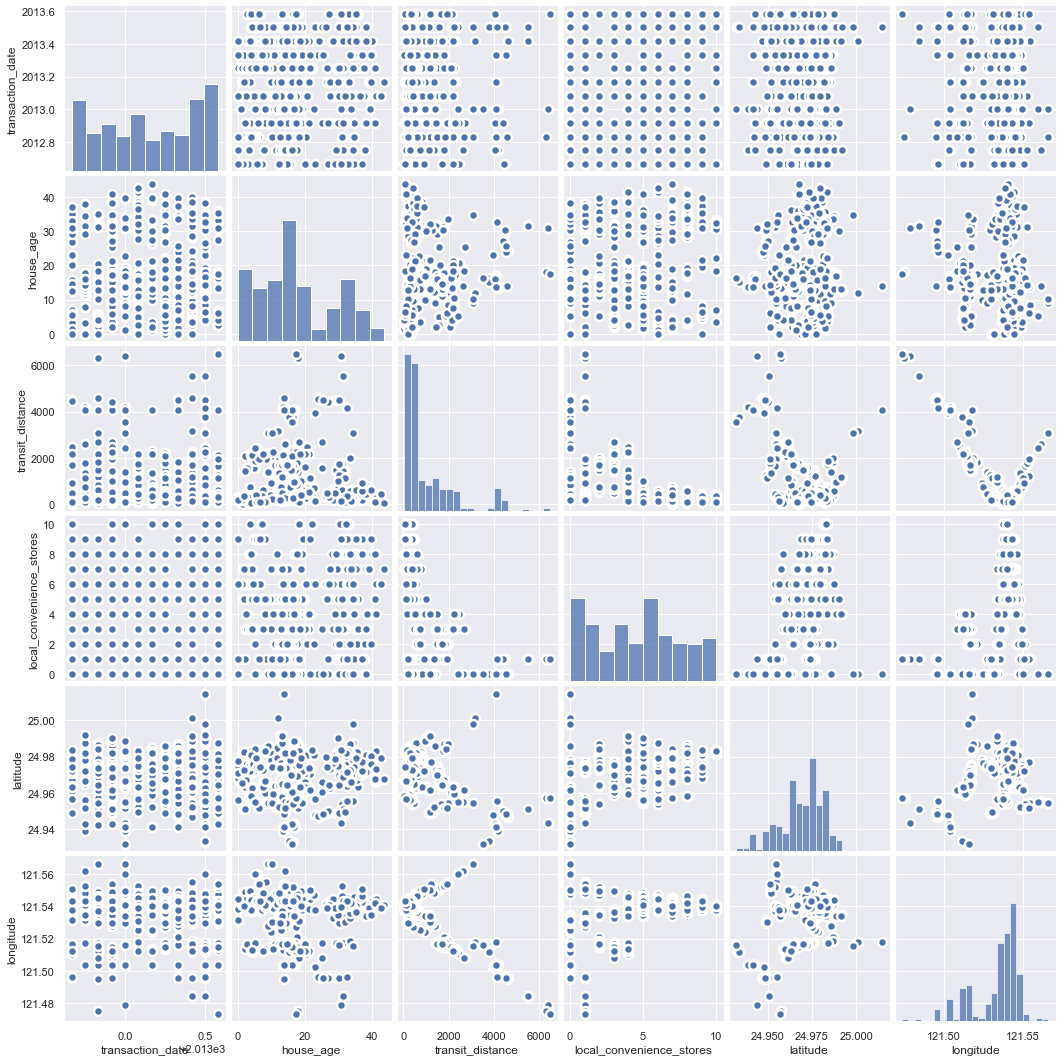

In [27]:
## Check for correlation among features
plt.figure(figsize = (20, 12))
num_cols = ['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
sns.pairplot(data[num_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

#### There is no signifcant correlation between any of the feature

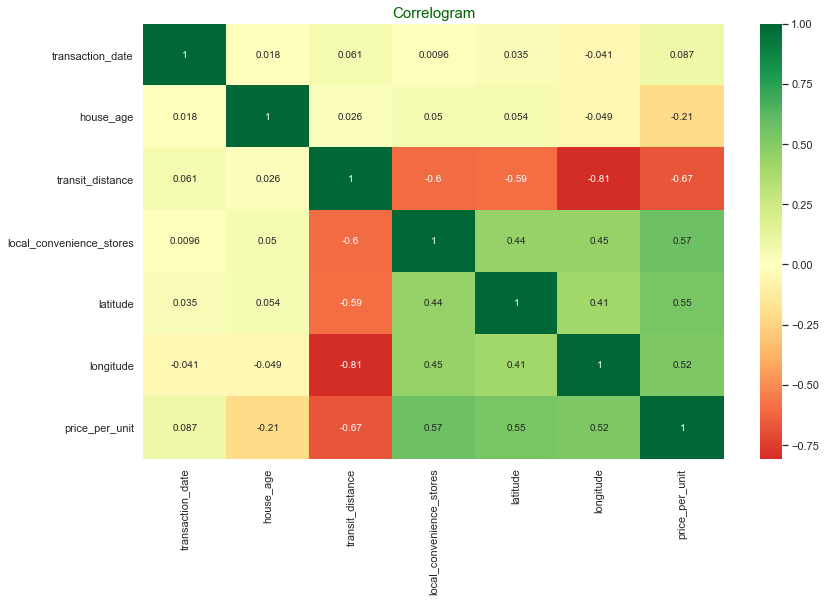

In [28]:
corr = data.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

#### Negative correlation are observed in the columns

#### Preprocessing the data

In [11]:
# Check for missing values
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

No missing or null datapoint

In [13]:
#Check for duplicates
data.duplicated().any()

False

 No duplicated datapoint

In [22]:
# Splitting the data into a training set and a test or validation set
data.shape

(414, 7)

In [25]:
train = data.loc[:279,:]
test = data.loc[280:,:]

In [26]:
# Checking out the newly created dataset
print(train.shape,test.shape)

(280, 7) (134, 7)


## Machine Learning Pipeline

In [110]:
features = ['house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
labels = ['price_per_unit']

X = train[features]
y = train[labels]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define preprocessing for numeric columns (scale them)
feature_columns = [ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',LinearRegression())])


# fit the pipeline to train a linear regression model on the training set
pipemodellr = pipeline.fit(X_train, y_train)
print (pipemodellr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', LinearRegression())])


## Evaluation Metrics

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Create predictions on the testing features
LRpredictions = pipemodellr.predict(X_test)

mse = mean_squared_error(y_test, LRpredictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, LRpredictions)
print("R2:", r2)

MSE: 62.92176696294397
RMSE: 7.932324184181076
R2: 0.5827800600384405


## Lasso

In [113]:
# Define preprocessing for numeric columns (scale them)
feature_columns = [ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',Lasso(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
pipemodellasso = pipeline.fit(X_train, y_train)
print (pipemodellasso)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', Lasso(random_state=0))])


In [114]:
#Create predictions on the testing features
Lassopredictions = pipemodellasso.predict(X_test)

mse = mean_squared_error(y_test, Lassopredictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, Lassopredictions)
print("R2:", r2)

MSE: 63.22878691523643
RMSE: 7.951653093240199
R2: 0.5807442804943299


## Ridge

In [115]:
# Define preprocessing for numeric columns (scale them)
feature_columns = [ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',Ridge(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
pipemodelridge = pipeline.fit(X_train, y_train)
print (pipemodelridge)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', Ridge(random_state=0))])


In [116]:
#Create predictions on the testing features
Ridgepredictions = pipemodelridge.predict(X_test)

mse = mean_squared_error(y_test, Ridgepredictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, Ridgepredictions)
print("R2:", r2)

MSE: 62.627130548995034
RMSE: 7.913730507731169
R2: 0.5847337271535211


## DecisionTreeRegressor

In [117]:
# Define preprocessing for numeric columns (scale them)
feature_columns = [ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',DecisionTreeRegressor(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
pipemodelDTR = pipeline.fit(X_train, y_train)
print (pipemodelDTR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', DecisionTreeRegressor(random_state=0))])


In [118]:
#Create predictions on the testing features
DTRpredictions = pipemodelDTR.predict(X_test)

mse = mean_squared_error(y_test, DTRpredictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, DTRpredictions)
print("R2:", r2)

MSE: 82.88240410052911
RMSE: 9.103977378076525
R2: 0.45042561053542074


## RandomForestRegressor

In [119]:
# Define preprocessing for numeric columns (scale them)
feature_columns = ['house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',RandomForestRegressor(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
pipemodelRFR= pipeline.fit(X_train, y_train)
print (pipemodelRFR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', RandomForestRegressor(random_state=0))])


In [120]:
#Create predictions on the testing features
RFRpredictions = pipemodelRFR.predict(X_test)

mse = mean_squared_error(y_test, RFRpredictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, RFRpredictions)
print("R2:", r2)

MSE: 44.24060594444673
RMSE: 6.651361209891305
R2: 0.7066505941119638


## GradientBoostingRegressor

In [121]:
# Define preprocessing for numeric columns (scale them)
feature_columns = ['house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',GradientBoostingRegressor(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
pipemodelGBR= pipeline.fit(X_train, y_train)
print (pipemodelGBR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', GradientBoostingRegressor(random_state=0))])


In [122]:
#Create predictions on the testing features
GBRpredictions = pipemodelGBR.predict(X_test)

mse = mean_squared_error(y_test, GBRpredictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, GBRpredictions)
print("R2:", r2)

MSE: 39.12558260993705
RMSE: 6.255044572977642
R2: 0.7405671516330348


The challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.


So far, the RandomForestRegressor model produced the lowest RMSE which is less than 7 i.e (RMSE=6.710290449526992)

## Saving the best model (RandomForestRegressor)

In [123]:
import joblib

#creating the file model directory
filename = './Model_with_RMSE_less_than_7.pkl'
filename2 = './Model_with_RMSE_less_than_7_reloaded.pkl'
#exporting the model
joblib.dump(pipemodelRFR,filename)
joblib.dump(pipemodelRFR,filename2)

['./Model_with_RMSE_less_than_7_reloaded.pkl']

## Review how the DTR model fitted the training features

In [124]:
from sklearn.tree import export_text

# fit the training sets
model_tree=DecisionTreeRegressor().fit(X_train, y_train)
tree = export_text(model_tree)
print(tree)

|--- feature_1 <= 753.66
|   |--- feature_0 <= 11.20
|   |   |--- feature_0 <= 10.65
|   |   |   |--- feature_1 <= 385.82
|   |   |   |   |--- feature_3 <= 24.98
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_1 <= 200.99
|   |   |   |   |   |   |   |--- feature_0 <= 1.30
|   |   |   |   |   |   |   |   |--- feature_0 <= 1.05
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- value: [50.35]
|   |   |   |   |   |   |   |   |   |--- feature_2 >  3.00
|   |   |   |   |   |   |   |   |   |   |--- value: [50.70]
|   |   |   |   |   |   |   |   |--- feature_0 >  1.05
|   |   |   |   |   |   |   |   |   |--- value: [51.50]
|   |   |   |   |   |   |   |--- feature_0 >  1.30
|   |   |   |   |   |   |   |   |--- value: [48.70]
|   |   |   |   |   |   |--- feature_1 >  200.99
|   |   |   |   |   |   |   |--- feature_4 <= 121.54
|   |   |   |   |   |   |   |   |--- feature_1 <= 241.20
|   |   |   |   |   |   |   |

## Use the trained model

In [ ]:
import joblib
# load the saved model from the file directory
model = joblib.load(filename2)


# Create the array for the test case
test_array = np.array([[16.2,289.3248,5.0,24.98203,121.54348],
                       [13.6,4082.015,0.0,24.94155,121.5038]])

# Use the model to predict the unit price
test_case_pred = model.predict(test_array)
print('Predictions for the price per unit for the new cases:')
for prediction in test_case_pred:
    print(round(prediction,2))
